In [1]:
HAPLOGREP = "/home/analytics/distr/haplogrep-cmd/haplogrep-2.1.16.jar"
BCFTOOLS = "/home/analytics/distr/samtools/bcftools/bcftools"
TOVCF = "/home/analytics/anaconda3/envs/bioinf/bin/23andme-to-vcf"

In [2]:
!mkdir -p ../data/week7

### Obtain professor's SNPs as well as github-guy's

In [3]:
!wget -P ../data/week7 http://public.dobzhanskycenter.ru/mrayko/BIMM185/SNP_raw_v4_Full_20170514175358.txt
!mv ../data/week7/SNP_raw_v4_Full_20170514175358.txt ../data/week7/SNP_prof.txt

!git clone https://github.com/msporny/dna ../data/week7/dna
!cp ../data/week7/dna/ManuSporny-genome.txt ../data/week7/SNP_gh.txt

--2018-11-20 22:03:42--  http://public.dobzhanskycenter.ru/mrayko/BIMM185/SNP_raw_v4_Full_20170514175358.txt
Resolving public.dobzhanskycenter.ru (public.dobzhanskycenter.ru)... 195.70.204.3
Connecting to public.dobzhanskycenter.ru (public.dobzhanskycenter.ru)|195.70.204.3|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15683002 (15M) [text/plain]
Saving to: ‘../data/week7/SNP_raw_v4_Full_20170514175358.txt’

100%[======================================>] 15,683,002  28.5MB/s   in 0.5s   

2018-11-20 22:03:43 (28.5 MB/s) - ‘../data/week7/SNP_raw_v4_Full_20170514175358.txt’ saved [15683002/15683002]

Cloning into '../data/week7/dna'...
remote: Enumerating objects: 18, done.
remote: Total 18 (delta 0), reused 0 (delta 0), pack-reused 18
Unpacking objects: 100% (18/18), done.


### Use GENOtation so as to get a clue about ethnicity
http://genotation.stanford.edu/#PCA

In [5]:
from matplotlib import pyplot as plt

%matplotlib inline

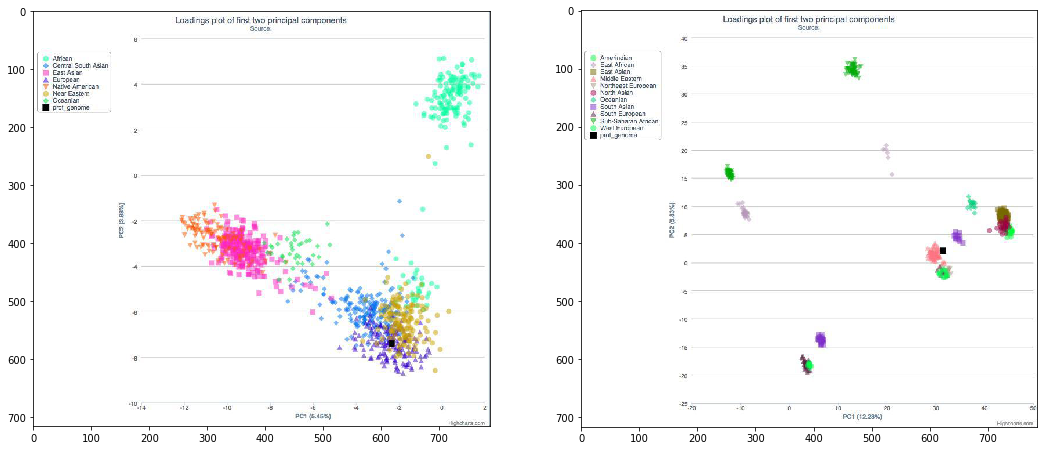

In [8]:
hgdp_prof = plt.imread("../data/week7/hgdp_prof.jpg")
ref_prof  = plt.imread("../data/week7/ref_prof.jpg")

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(hgdp_prof)

ax = fig.add_subplot(1, 2, 2)
ax.imshow(ref_prof)

In [ ]:
hgdp_sporny = plt.imread("../data/week7/hgdp_sporny.jpg")
ref_sporny  = plt.imread("../data/week7/ref_sporny.jpg")

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(hgdp_sporny)

ax = fig.add_subplot(1, 2, 2)
ax.imshow(ref_sporny)

In [ ]:
!head -n 25 ../data/week7/SNP.txt

In [ ]:
from multiprocessing import Process, Pipe
import numpy as np
import pandas as pd

In [ ]:
!cat ../data/week7/SNP.txt | tail -n +21 > ../data/week7/SNP_.txt

In [ ]:
!$TOVCF --input ../data/week7/SNP.txt --fasta /data/analytics/bioinf_workshop/data/week6/hg19_.fa --fai /data/analytics/bioinf_workshop/data/week6/hg19_.fa.fai --output ../data/week7/prof_SNP.vcf

In [ ]:
!$TOVCF --input ../data/week7/SNP_gh.txt --fasta /data/analytics/bioinf_workshop/data/week6/hg19_.fa --fai /data/analytics/bioinf_workshop/data/week6/hg19_.fa.fai --output ../data/week7/SNP_gh.vcf

In [ ]:
!head -n 20 ../data/week7/prof_SNP.vcf

In [ ]:
!head -n 20 ../data/week7/SNP_gh.vcf

In [ ]:
import requests

In [ ]:
!wget -P ../data/week7/ ftp://ftp.ncbi.nih.gov/snp/organisms/human_9606_b151_GRCh38p7/database/organism_data/SNPClinSig.bcp.gz

In [ ]:
!gunzip ../data/week7/SNPClinSig.bcp.gz

In [ ]:
!head -n 25 ../data/week7/SNPClinSig.bcp

In [ ]:
!wget -P ../data/week7/ ftp://ftp.ncbi.nih.gov/snp/organisms/human_9606_b151_GRCh38p7/database/organism_data/b151_SNPHGVSLink_clin_108.bcp.gz
!gunzip ../data/week7/b151_SNPHGVSLink_clin_108.bcp.gz
!head -n 25 ../data/week7/b151_SNPHGVSLink_clin_108.bcp

In [ ]:
snp_clin_dict = dict()

for snp_id in tqdm(prof_snp_df.loc[:, "id"], total=prof_snp_df.shape[0]):
    response = requests.get("https://www.ncbi.nlm.nih.gov/snp/{}".format(snp_id))
    if "Not Reported in ClinVar" in soup.find("div", attrs={"id": "clinical_significance"}).text:
        snp_clin_dict[snp_id] = None
    else:
        snp_clin_dict[snp_id] = soup.find("div", attrs={"id": "clinical_significance"}).text
        break

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
!wget -P /data/analytics/bioinf_workshop/data/week7 ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/ALL.chr1.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz

In [ ]:
!gunzip /data/analytics/bioinf_workshop/data/week7/ALL.chr1.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz

In [ ]:
cnt = 0

with open("/data/analytics/bioinf_workshop/data/week7/ALL.chr1.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf", "r") as f:
    for line in f:
        cnt += 1
        if cnt > 10000000:
            break
        
print(cnt)

In [ ]:
!cat /data/analytics/bioinf_workshop/data/week7/ALL.chr1.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf | tail -n +254 | awk '{ print $3 }' > ../data/week7/mutation_ids

In [ ]:
mutation_ids = !cat ../data/week7/mutation_ids

In [ ]:
INDIVIDUALS = 2504

In [ ]:
def proc_chunk(chunk, conn, start_line_i):
    result = np.zeros((len(chunk), INDIVIDUALS, 2), dtype=np.bool)
    
    indices = []
    meta = []
    idx_meta_dict = dict()
    
    for line_i, line in enumerate(chunk):
        meta.append(line.split("\t")[:3])
        values = np.array([[int(e) for e in p.strip().split("|")] for p in line.split("\t")[9:]])
        result[line_i] = values
            
    conn.send(result)
    conn.close()

In [ ]:
%%time

counter = 0
result = []
START_LINE = 253
CHUNK_SIZE = 100000

if __name__ == '__main__':
    with open("/data/analytics/bioinf_workshop/data/week7/ALL.chr1.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf", "r") as f:
        cur_chunk = []
        processes = []
        pipes = []
        for line in f:
            counter += 1
            
            if counter <= START_LINE:
                continue
            
            cur_chunk.append(line)
            if (counter - START_LINE) % CHUNK_SIZE == 0:
                parent_conn, child_conn = Pipe()
                pipes.append(parent_conn)
                cur_chunk_i = (counter - START_LINE - 1) // CHUNK_SIZE
                p = Process(target=proc_chunk, args=(cur_chunk, child_conn, cur_chunk_i * CHUNK_SIZE))
                processes.append(p)
                processes[-1].start()
                cur_chunk = []
                
        if (counter - START_LINE) % CHUNK_SIZE != 0:
            parent_conn, child_conn = Pipe()
            pipes.append(parent_conn)
            cur_chunk_i = (counter - START_LINE - 1) // CHUNK_SIZE
            p = Process(target=proc_chunk, args=(cur_chunk, child_conn, cur_chunk_i * CHUNK_SIZE))
            processes.append(p)
            processes[-1].start()
            cur_chunk = []
                
    for p in pipes:
        result.append(p.recv())
                
    for p in processes:
        p.join()

In [ ]:
result_concat = np.concatenate(result)

In [ ]:
np.savez_compressed("/data/analytics/bioinf_workshop/data/week7/pop_snps.npz", result_concat)

In [ ]:
result_concat = np.load("/data/analytics/bioinf_workshop/data/week7/pop_snps.npz")["arr_0"]

In [ ]:
result_concat.shape

In [ ]:
ind_line = !cat /data/analytics/bioinf_workshop/data/week7/ALL.chr1.phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf | tail -n +253 | head -n 1

In [ ]:
individuals = ind_line[0].split("\t")[9:]

In [ ]:
# !wget -P ../data/week7/ http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/working/20130606_sample_info/20130606_sample_info.xlsx
    
sample_pop_dict = dict()

samples_df = pd.read_excel("../data/week7/20130606_sample_info.xlsx")
for g in samples_df.groupby("Population"):
    for r in g[1].iterrows():
        sample_pop_dict[r[1]["Sample"]] = g[0]
        
for col in individuals:
    if col not in sample_pop_dict:
        print(col)
        break

In [ ]:
from collections import defaultdict

In [ ]:
populations = defaultdict(list)

for ind_i, ind in enumerate(individuals):
    populations[sample_pop_dict[ind]].append(ind_i)

In [ ]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
homo_mut = dict()
het_mut  = dict()

for pop in tqdm(populations):
    snps = result_concat[:, populations[pop]]
    pop_agg = snps.mean(axis=1)
    homo_mut[pop] = np.where(pop_agg.sum(axis=1) == 2)
    het_mut[pop]  = np.where(pop_agg.sum(axis=1) == 1)

In [ ]:
prof_snp_df = pd.read_csv("../data/week7/prof_SNP.vcf", skiprows=5, sep="\t")
prof_snp_df.columns = ["chromosome", "pos", "id", "ref", "alt", "qual", "filter", "info", "format", "sample"]

In [ ]:
!head -n 30 ../data/week7/clinvar_20181028.vcf

In [ ]:
clinvar_df = pd.read_csv("../data/week7/clinvar_20181028.vcf", skiprows=28, sep="\s+", header=None)
clinvar_df.columns = "CHROM POS ID REF ALT QUAL FILTER INFO".split()

In [ ]:
print(123)

In [ ]:
clinvar_df.shape

In [ ]:
clinvar_df.loc[:, ["CHROM", "POS", "REF", "ALT"]]
clin_dict = dict()

for row in tqdm(clinvar_df.iterrows(), total=clinvar_df.shape[0]):
    clin_dict[tuple(row[1][["CHROM", "POS", "REF", "ALT"]].tolist())] = tuple(row[1][["ID", "INFO"]].tolist())

In [ ]:
list(clin_dict.keys())[-1000:]

In [ ]:
prof_snp_df

In [ ]:
key

In [ ]:
prof_clin_sig = []

for row in tqdm(prof_snp_df.iterrows(), total=prof_snp_df.shape[0]):
    key = row[1][["chromosome", "pos", "ref", "alt"]].tolist()
    key[0] = int(key[0])
    key = tuple(key)
    if key in clin_dict:
        prof_clin_sig.append(clin_dict[key])

In [ ]:
prof_clin_sig[:100]

In [ ]:
len(prof_clin_sig)

In [ ]:
prof_snp_df.loc[:, "chromosome"] = prof_snp_df.chromosome.apply(lambda s: s.replace("chr", ""))

In [ ]:
prof_snp_df.loc[:, ["chromosome", "pos", "ref", "alt"]]

In [ ]:
gh_snp_df = pd.read_csv("../data/week7/SNP_gh.vcf", skiprows=5, sep="\t")
gh_snp_df.columns = ["chromosome", "pos", "id", "ref", "alt", "qual", "filter", "info", "format", "sample"]

In [ ]:
mutation_ids

In [ ]:
mutation_dict = dict([(k, v) for v, k in enumerate(mutation_ids)])

In [ ]:
red_mut_dict = dict()
prof_mut_dict = dict()

for row in prof_snp_df.iterrows():
    prof_rs_id = row[1]["id"]
    if prof_rs_id in mutation_dict:
        red_mut_dict[prof_rs_id] = mutation_dict[prof_rs_id]
        prof_mut_dict[prof_rs_id] = [int(s) for s in row[1]["sample"].split("/")]

In [ ]:
gh_red_mut_dict = dict()
gh_mut_dict = dict()

for row in gh_snp_df.iterrows():
    gh_rs_id = row[1]["id"]
    if gh_rs_id in mutation_dict:
        gh_red_mut_dict[gh_rs_id] = mutation_dict[gh_rs_id]
        gh_mut_dict[gh_rs_id] = [int(s) for s in row[1]["sample"].split("/")]

In [ ]:
homo_mut_prof = [k for k, v in prof_mut_dict.items() if v == [1, 1]]
het_mut_prof  = [k for k, v in prof_mut_dict.items() if sorted(v) == [0, 1]]

In [ ]:
homo_mut_gh = [k for k, v in gh_mut_dict.items() if v == [1, 1]]
het_mut_gh  = [k for k, v in gh_mut_dict.items() if sorted(v) == [0, 1]]

In [ ]:
homo_mut_prof_idx = [red_mut_dict[m] for m in homo_mut_prof]
het_mut_prof_idx = [red_mut_dict[m] for m in het_mut_prof]
matches = []

for pop in homo_mut:
    homo_intersection = set(homo_mut[pop][0]).intersection(homo_mut_prof_idx)
    het_intersection  = set(het_mut[pop][0]).intersection(het_mut_prof_idx)
    
    matches.append((pop, len(homo_intersection) / len(homo_mut[pop][0]), len(het_intersection) / len(het_mut[pop][0])))
    
sorted(matches, key=lambda p: -float(p[1]))

In [ ]:
len(homo_mut[pop][0])

In [ ]:
homo_mut_gh_idx = [gh_red_mut_dict[m] for m in homo_mut_gh]
het_mut_gh_idx = [gh_red_mut_dict[m] for m in het_mut_gh]
matches = []

for pop in homo_mut:
    homo_intersection = set(homo_mut[pop][0]).intersection(homo_mut_gh_idx)
    het_intersection  = set(het_mut[pop][0]).intersection(het_mut_gh_idx)
    
    matches.append((pop, len(homo_intersection) / len(homo_mut[pop][0]), len(het_intersection) / len(het_mut[pop][0])))
    
sorted(matches, key=lambda p: -(p[1]))

In [ ]:
cur_i = 0
cur_meta_i = 0

result_np = np.concatenate([r[0] for r in result])
meta_np = np.concatenate([r[1] for r in result])
new_dict = dict()

for r in result:
    for k in r[2]:
        new_dict[k + cur_i] = r[2][k] + cur_meta_i
        
    cur_i += len(r[2])
    cur_meta_i += len(r[1])

In [ ]:
import scipy as sp
from scipy import sparse

In [ ]:
meta_np

In [ ]:
prof_snp_df.head()

In [ ]:
np.where(meta_np[:, 2] == "rs367896724")

In [ ]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
def fun(rs_id):
    wh = np.where(meta_np[:, 2] == rs_id)[0]
    if len(wh) == 1:
        return wh[0]

In [ ]:
from multiprocessing import Pool

In [ ]:
with Pool(2) as p:
    result = p.map(fun, prof_snp_df.loc[:100, "id"].tolist())

In [ ]:
print(123)

In [ ]:
rs_id_of_interest = dict()

for rs_id in tqdm(prof_snp_df.loc[:100, "id"]):
    wh = np.where(meta_np[:, 2] == rs_id)[0]
    if len(wh) == 1:
        rs_id_of_interest[rs_id] = wh[0]

In [ ]:
"rs367896724" in meta_np[:, 2]

In [ ]:
!head -n 20 ../data/week7/prof_SNP.vcf

In [ ]:
print(123)

In [ ]:
result_np.max(axis=0)

In [ ]:
sparse_matrix = sparse.coo_matrix(result_np)

In [ ]:
sparse_matrix.shape

In [ ]:
len(new_dict)

In [ ]:
meta_np.shape

In [ ]:
result_np.shape

In [ ]:
columns = data[252].split("\t")

In [ ]:
!wget -P ../data/week7/ http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/working/20130606_sample_info/20130606_sample_info.xlsx
    
sample_pop_dict = dict()

samples_df = pd.read_excel("../data/week7/20130606_sample_info.xlsx")
for g in samples_df.groupby("Population"):
    for r in g[1].iterrows():
        sample_pop_dict[r[1]["Sample"]] = g[0]
        
for col in columns[9:]:
    if col not in sample_pop_dict:
        print(col)
        break

In [ ]:
var_strings = data[253:]

var_df = pd.DataFrame([s.split("\t") for s in var_strings])

In [ ]:
var_df.shape

In [ ]:
sample_pop_dict

In [ ]:
data[300]